In [3]:
# verificar kernel utilizado
import sys
sys.executable

'/home/henrique/Documents/facul/7_semestre/ciencia_de_dados_av1/.venv/bin/python'

In [1]:
# importar bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import Config
from src.data_processing import DataDict, ItemDict
import json

## Organizar path para arquivos do enem 2023

In [2]:
# diretório dos dados
data_dirs = Config.get_path_dir_data()
# caminho para o arquivo csv da variáveis e suas categorias
path_dict = data_dirs["DICIONÁRIO"]["MICRODADOS_ENEM_2023.csv"]

# caminho para os microdados do enem 2023
path_microdados = data_dirs["DADOS"]["MICRODADOS_ENEM_2023.csv"]
# caminho para os itens das provas
path_itens = data_dirs["DADOS"]["ITENS_PROVA_2023.csv"]

# Caminho para o dicionário de variveis dos microdados
path_dict_microdados = data_dirs["DICIONÁRIO"]["MICRODADOS_ENEM_2023.csv"]
# Caminho para o dicionário de variveis dos microdados
path_dict_itens = data_dirs["DICIONÁRIO"]["ITENS_PROVA_2023.csv"]

## Caminho para diretório dos arquivos Parquet

In [3]:
path_dir_parquet = data_dirs["DADOS"]["MICRODADOS_ENEM_2023_parquet"]
dict_files_path = path_dir_parquet.list_file()

## Criar objeto dos dicionários e suas categorias 

In [4]:
dict_microdados = DataDict(path_dict_microdados)
dict_itens = ItemDict(path_dict_itens)

In [7]:
dict_itens.tabel

,Nome da variavel,Descricao,Variavel Categorica,Tamanho,Tipo
0,CO_POSICAO,PosiÃ§Ã£o do Item na Prova,False,3,NumÃ©rica
1,SG_AREA,Ãrea de Conhecimento do Item,True,2,AlfanumÃ©rica
2,CO_ITEM,CÃ³digo do Item,False,5,NumÃ©rica
3,TX_GABARITO,Gabarito do ItemÂ¹,False,1,AlfanumÃ©rica
4,CO_HABILIDADE,Habilidade do Item,False,2,NumÃ©rica
5,IN_ITEM_ABAN,Indicador de item abandonado,True,1,NumÃ©rica
6,TX_MOTIVO_ABAN,Motivo para o abandono do item,False,40,AlfanumÃ©rica
7,NU_PARAM_A,ParÃ¢metro de discriminaÃ§Ã£o: Ã© o poder de d...,False,9,NumÃ©rica
8,NU_PARAM_B,ParÃ¢metro de dificuldade: associado Ã dificu...,False,9,NumÃ©rica
9,NU_PARAM_C,ParÃ¢metro de acerto ao acaso: Ã© a probabilid...,False,9,NumÃ©rica


In [18]:
dict_microdados.tabel

,Nome da variavel,Descricao,Variavel Categorica,Tamanho,Tipo
0,NU_INSCRICAO,NÃºmero de inscriÃ§Ã£o1,False,12,NumÃ©rica
1,NU_ANO,Ano do Enem,False,4,NumÃ©rica
2,TP_FAIXA_ETARIA,Faixa etÃ¡ria2,True,2,NumÃ©rica
3,TP_SEXO,Sexo,True,1,AlfanumÃ©rica
4,TP_ESTADO_CIVIL,Estado Civil,True,1,NumÃ©rica
...,...,...,...,...,...
76,Q021,Na sua residÃªncia tem TV por assinatura?,True,1,AlfanumÃ©rica
77,Q022,Na sua residÃªncia tem telefone celular?,True,1,AlfanumÃ©rica
78,Q023,Na sua residÃªncia tem telefone fixo?,True,1,AlfanumÃ©rica
79,Q024,Na sua residÃªncia tem computador?,True,1,AlfanumÃ©rica


## Data Frames

In [5]:
df_microdado_0 = pd.read_parquet(dict_files_path["part_0.parquet"])
df_microdado_1 = pd.read_parquet(dict_files_path["part_1.parquet"])

In [6]:
df_concat = pd.concat([df_microdado_0, df_microdado_1], ignore_index=1)
del df_microdado_1
del df_microdado_0

## Perguntas

### "Como está distribuída a nota da prova de matemática? Há valores atípicos que se destacam?"

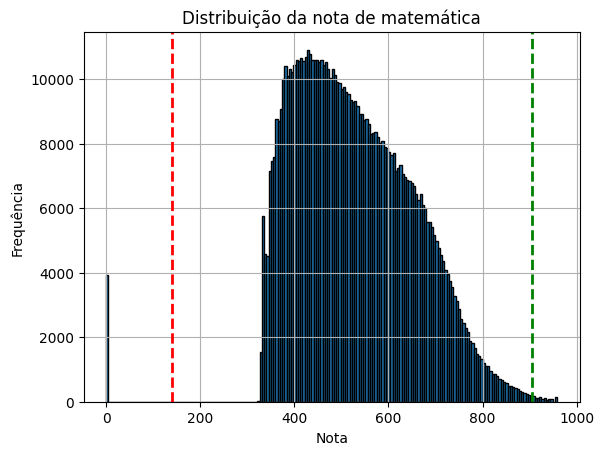

In [7]:
# usando histogramas

# Calcular Q1, Q3 e IQR
Q1 = df_concat['NU_NOTA_MT'].quantile(0.25)
Q3 = df_concat['NU_NOTA_MT'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_concat['NU_NOTA_MT'].hist(bins=200, edgecolor='black')


plt.axvline(limite_inferior, color='red', linestyle='dashed', linewidth=2, label='Limite Inferior Tukey')
plt.axvline(limite_superior, color='green', linestyle='dashed', linewidth=2, label='Limite Superior Tukey')


plt.title('Distribuição da nota de matemática')
plt.xlabel('Nota')
plt.ylabel('Frequência')

plt.show()

### "O fato de realizar a prova em um município diferente daquele onde o candidato estuda afeta sua nota em matemática?"

In [8]:
df_filtered = df_concat[df_concat["NO_MUNICIPIO_ESC"].notna() & df_concat["NO_MUNICIPIO_PROVA"].notna()]

engual = df_filtered[df_filtered["NO_MUNICIPIO_ESC"] == df_filtered["NO_MUNICIPIO_PROVA"]]
dif = df_filtered[df_filtered["NO_MUNICIPIO_ESC"] != df_filtered["NO_MUNICIPIO_PROVA"]]

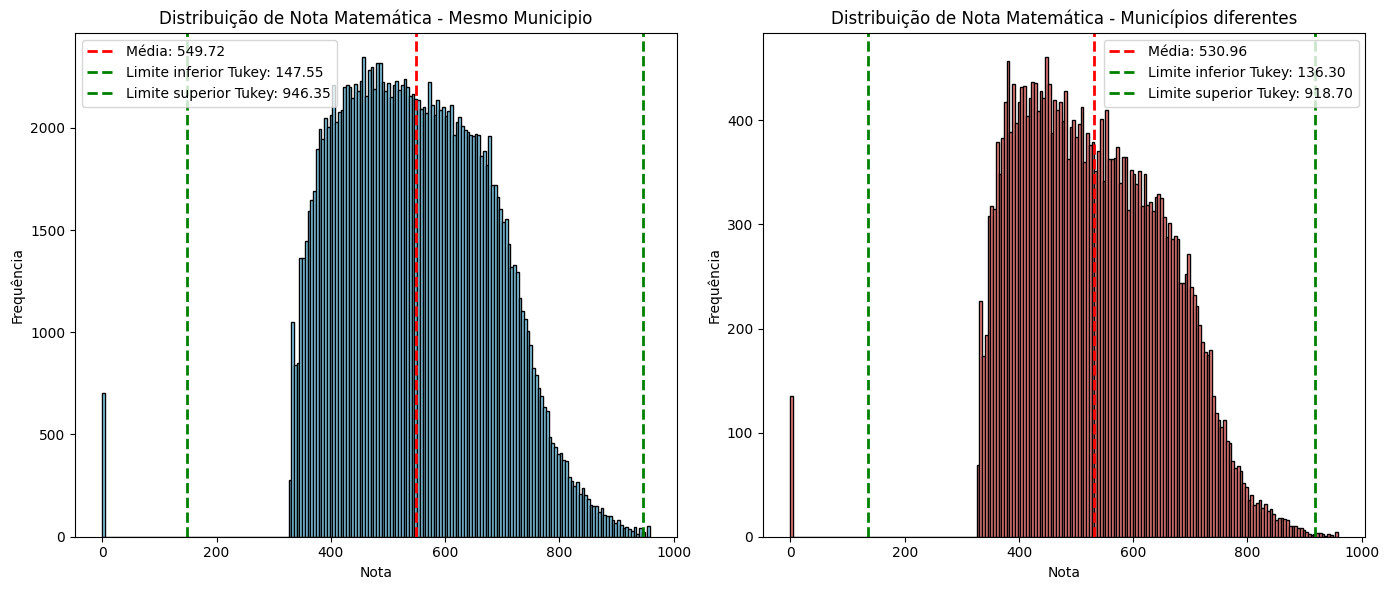

In [9]:
nota_mat_engual = engual["NU_NOTA_MT"]
nota_mat_dif = dif["NU_NOTA_MT"]

def tukey_limits(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    mean_value = np.mean(data)
    return lower_limit, upper_limit, mean_value

# Calculando limites de Tukey e médias
lower_limit_engual, upper_limit_engual, mean_engual = tukey_limits(nota_mat_engual)
lower_limit_dif, upper_limit_dif, mean_dif = tukey_limits(nota_mat_dif)

# Criando a grid 1x2 de gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


axes[0].hist(nota_mat_engual, bins=200, edgecolor='black', color='skyblue')
axes[0].axvline(mean_engual, color='red', linestyle='dashed', linewidth=2, label=f'Média: {mean_engual:.2f}')
axes[0].axvline(lower_limit_engual, color='green', linestyle='dashed', linewidth=2, label=f'Limite inferior Tukey: {lower_limit_engual:.2f}')
axes[0].axvline(upper_limit_engual, color='green', linestyle='dashed', linewidth=2, label=f'Limite superior Tukey: {upper_limit_engual:.2f}')
axes[0].set_title('Distribuição de Nota Matemática - Mesmo Municipio')
axes[0].set_xlabel('Nota')
axes[0].set_ylabel('Frequência')
axes[0].legend()


axes[1].hist(nota_mat_dif, bins=200, edgecolor='black', color='lightcoral')
axes[1].axvline(mean_dif, color='red', linestyle='dashed', linewidth=2, label=f'Média: {mean_dif:.2f}')
axes[1].axvline(lower_limit_dif, color='green', linestyle='dashed', linewidth=2, label=f'Limite inferior Tukey: {lower_limit_dif:.2f}')
axes[1].axvline(upper_limit_dif, color='green', linestyle='dashed', linewidth=2, label=f'Limite superior Tukey: {upper_limit_dif:.2f}')
axes[1].set_title('Distribuição de Nota Matemática - Municípios diferentes')
axes[1].set_xlabel('Nota')
axes[1].set_ylabel('Frequência')
axes[1].legend()

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()

### "Ter computador ou acesso a internet na residência impacta na nota em matemática?"

In [7]:
c_internet_c_computador = df_concat[(df_concat["Q025"] == 'B') & (df_concat["Q024"] != 'A')]["NU_NOTA_MT"]
n_internet_c_computador = df_concat[(df_concat["Q025"] == 'A') & (df_concat["Q024"] != 'A')]["NU_NOTA_MT"]
c_internet_n_computador = df_concat[(df_concat["Q025"] == 'B') & (df_concat["Q024"] == 'A')]["NU_NOTA_MT"]
n_internet_n_computador = df_concat[(df_concat["Q025"] == 'A') & (df_concat["Q024"] == 'A')]["NU_NOTA_MT"]

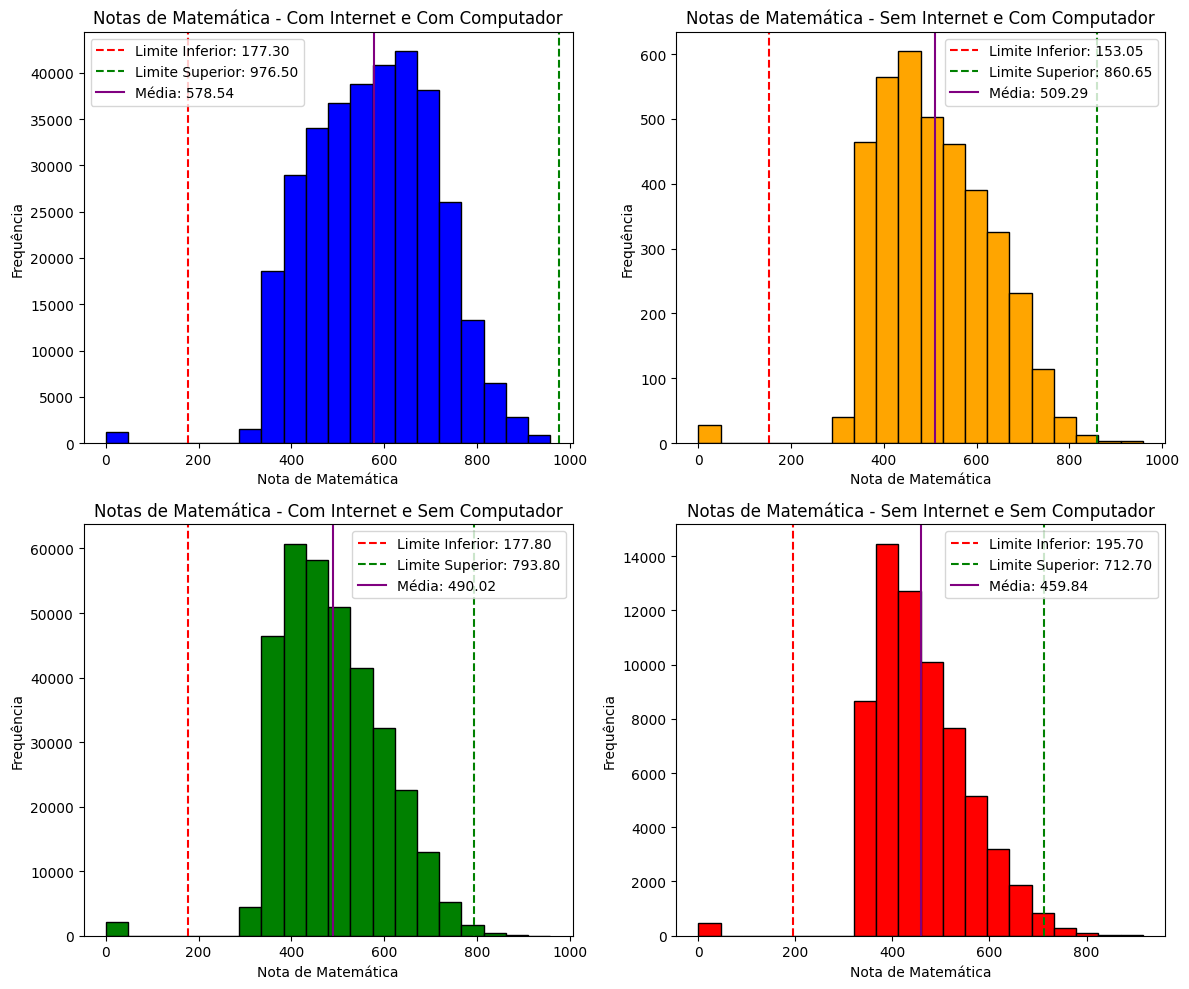

In [13]:
# Função para calcular os limites da cerca de Tukey
def tukey_limits(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return lower_limit, upper_limit

# Remover NaN dos DataFrames
c_internet_c_computador = c_internet_c_computador.dropna()
n_internet_c_computador = n_internet_c_computador.dropna()
c_internet_n_computador = c_internet_n_computador.dropna()
n_internet_n_computador = n_internet_n_computador.dropna()

# Plotando as distribuições
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: c_internet_c_computador
axes[0, 0].hist(c_internet_c_computador, bins=20, edgecolor='black', color='blue')
lower_limit, upper_limit = tukey_limits(c_internet_c_computador)
mean_value = c_internet_c_computador.mean()
axes[0, 0].axvline(lower_limit, color='red', linestyle='dashed', label=f'Limite Inferior: {lower_limit:.2f}')
axes[0, 0].axvline(upper_limit, color='green', linestyle='dashed', label=f'Limite Superior: {upper_limit:.2f}')
axes[0, 0].axvline(mean_value, color='purple', linestyle='solid', label=f'Média: {mean_value:.2f}')
axes[0, 0].set_title('Notas de Matemática - Com Internet e Com Computador')
axes[0, 0].set_xlabel('Nota de Matemática')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].legend()

# Plot 2: n_internet_c_computador
axes[0, 1].hist(n_internet_c_computador, bins=20, edgecolor='black', color='orange')
lower_limit, upper_limit = tukey_limits(n_internet_c_computador)
mean_value = n_internet_c_computador.mean()
axes[0, 1].axvline(lower_limit, color='red', linestyle='dashed', label=f'Limite Inferior: {lower_limit:.2f}')
axes[0, 1].axvline(upper_limit, color='green', linestyle='dashed', label=f'Limite Superior: {upper_limit:.2f}')
axes[0, 1].axvline(mean_value, color='purple', linestyle='solid', label=f'Média: {mean_value:.2f}')
axes[0, 1].set_title('Notas de Matemática - Sem Internet e Com Computador')
axes[0, 1].set_xlabel('Nota de Matemática')
axes[0, 1].set_ylabel('Frequência')
axes[0, 1].legend()

# Plot 3: c_internet_n_computador
axes[1, 0].hist(c_internet_n_computador, bins=20, edgecolor='black', color='green')
lower_limit, upper_limit = tukey_limits(c_internet_n_computador)
mean_value = c_internet_n_computador.mean()
axes[1, 0].axvline(lower_limit, color='red', linestyle='dashed', label=f'Limite Inferior: {lower_limit:.2f}')
axes[1, 0].axvline(upper_limit, color='green', linestyle='dashed', label=f'Limite Superior: {upper_limit:.2f}')
axes[1, 0].axvline(mean_value, color='purple', linestyle='solid', label=f'Média: {mean_value:.2f}')
axes[1, 0].set_title('Notas de Matemática - Com Internet e Sem Computador')
axes[1, 0].set_xlabel('Nota de Matemática')
axes[1, 0].set_ylabel('Frequência')
axes[1, 0].legend()

# Plot 4: n_internet_n_computador
axes[1, 1].hist(n_internet_n_computador, bins=20, edgecolor='black', color='red')
lower_limit, upper_limit = tukey_limits(n_internet_n_computador)
mean_value = n_internet_n_computador.mean()
axes[1, 1].axvline(lower_limit, color='red', linestyle='dashed', label=f'Limite Inferior: {lower_limit:.2f}')
axes[1, 1].axvline(upper_limit, color='green', linestyle='dashed', label=f'Limite Superior: {upper_limit:.2f}')
axes[1, 1].axvline(mean_value, color='purple', linestyle='solid', label=f'Média: {mean_value:.2f}')
axes[1, 1].set_title('Notas de Matemática - Sem Internet e Sem Computador')
axes[1, 1].set_xlabel('Nota de Matemática')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].legend()

# Ajustando layout
plt.tight_layout()
plt.show()


### "Qual a influência da situação de conclusão do ensino médio (TP_ST_CONCLUSAO) sobre a nota de matemática, levando em conta o gênero do candidato?"

In [7]:
masculino = df_concat[df_concat["TP_SEXO"] == 'M']
feminino = df_concat[df_concat["TP_SEXO"] == 'F']

In [8]:
category_dict = dict_microdados.legenda["TP_ST_CONCLUSAO"]
category = list(category_dict["categoria"])
descricao = list(category_dict["descricao"])
dict_map = {int(c):d for c, d in zip(category, descricao)}

In [9]:
masculino["TP_ST_CONCLUSAO"] = masculino["TP_ST_CONCLUSAO"].map(dict_map)
feminino["TP_ST_CONCLUSAO"] = feminino["TP_ST_CONCLUSAO"].map(dict_map) 

/tmp/ipykernel_16848/3763183630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masculino["TP_ST_CONCLUSAO"] = masculino["TP_ST_CONCLUSAO"].map(dict_map)
/tmp/ipykernel_16848/3763183630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feminino["TP_ST_CONCLUSAO"] = feminino["TP_ST_CONCLUSAO"].map(dict_map)


In [10]:
masculino = masculino["TP_ST_CONCLUSAO"]
feminino = feminino["TP_ST_CONCLUSAO"]

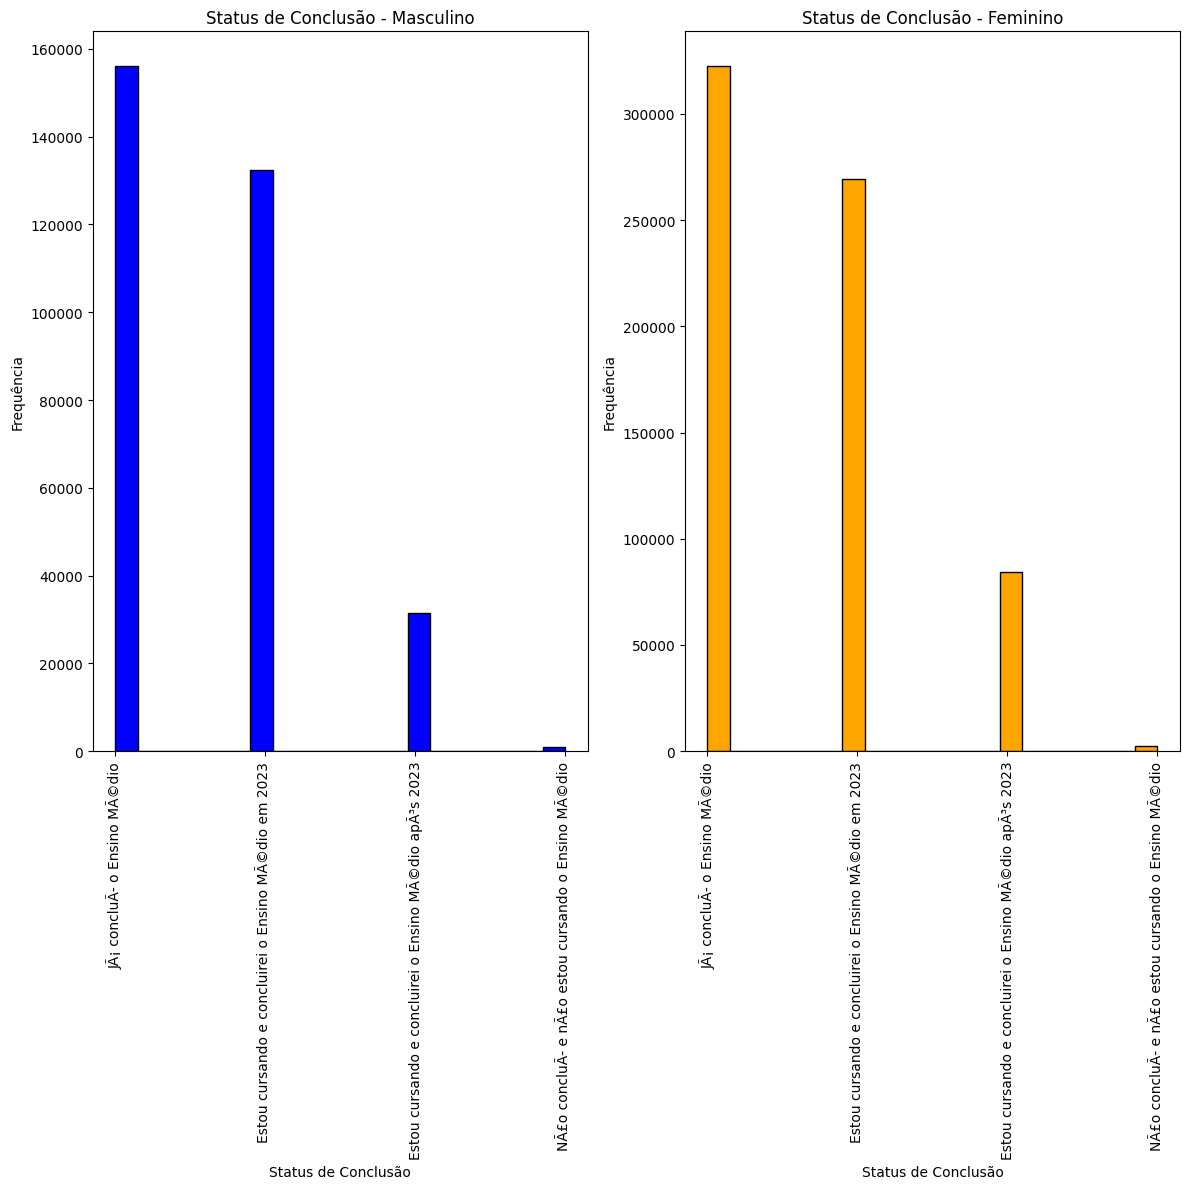

In [14]:
# Remover NaN dos DataFrames
masculino = masculino.dropna()
feminino = feminino.dropna()

# Plotando as distribuições
fig, axes = plt.subplots(1, 2, figsize=(12, 12))

# Plot 1: Masculino
axes[0].hist(masculino, bins=20, edgecolor='black', color='blue')
axes[0].set_title('Status de Conclusão - Masculino')
axes[0].set_xlabel('Status de Conclusão')
axes[0].set_ylabel('Frequência')
axes[0].tick_params(axis='x', rotation=90)  # Rotaciona os rótulos do eixo X

# Plot 2: Feminino
axes[1].hist(feminino, bins=20, edgecolor='black', color='orange')
axes[1].set_title('Status de Conclusão - Feminino')
axes[1].set_xlabel('Status de Conclusão')
axes[1].set_ylabel('Frequência')
axes[1].tick_params(axis='x', rotation=90)  # Rotaciona os rótulos do eixo X

# Ajustando layout
plt.tight_layout()
plt.show()
